##### Analiza danych w języku Python 2024/2025 sem. letni
Analityka gospodarcza

# Analiza cech i uwarunkowań związanych z diagnozą depresji wśród studentów w Indiach
## Zagadnienie klasyfikacji

##### Adamin Hanna 237314
##### Baran Jakub 238885
##### Karoukin Tsikhan 222556

In [6]:
# import pakietów
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pandas.api.types import CategoricalDtype

In [7]:
# wczytanie zbioru danych
tenfolder = os.getcwd()
sciezka = os.path.join(tenfolder, 'dane', 'student_depression_dataset.xlsx')
dane = pd.read_excel('student_depression_dataset.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: 'student_depression_dataset.xlsx'

## 1. Dane

In [5]:
dane.head()

NameError: name 'dane' is not defined

In [7]:
print(dane.info())
# wszystkie zmienne wczytano jako liczbowe, choć niektóre stanowią kategorie

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27855 entries, 0 to 27854
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     27855 non-null  int64  
 1   Gender                 27855 non-null  int64  
 2   Age                    27855 non-null  int64  
 3   Academic Pressure      27855 non-null  int64  
 4   CGPA                   27855 non-null  float64
 5   Study Satisfaction     27855 non-null  int64  
 6   Sleep Duration         27855 non-null  int64  
 7   Dietary Habits         27855 non-null  int64  
 8   Suicidal thoughts      27855 non-null  int64  
 9   Work/Study Hours       27855 non-null  int64  
 10  Financial Stress       27855 non-null  int64  
 11  Family Mental Illness  27855 non-null  int64  
 12  Depression             27855 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 2.8 MB
None


### Zmienne stanowiące kategorie
Rozkład wartości:

In [9]:
# Gender
print(dane.iloc[:,1].value_counts())
print('----------------------------')


# Academic Pressure
print("")
print(dane.iloc[:,3].value_counts())
print('----------------------------')

# Study Satisfaction
print("")
print(dane.iloc[:,5].value_counts())
print('----------------------------')

# Sleep Duration
print("")
print(dane.iloc[:,6].value_counts())
print('----------------------------')

# Dietary Habits
print("")
print(dane.iloc[:,7].value_counts())
print('----------------------------')

# Suicidal Thoughts
print("")
print(dane.iloc[:,8].value_counts())
print('----------------------------')

# Financial Stress
print("")
print(dane.iloc[:,10].value_counts())
print('----------------------------')

# Family Mental Illness
print("")
print(dane.iloc[:,11].value_counts())
print('----------------------------')


# Depression
print("")
print("Zmienna celu:")
print(dane['Depression'].value_counts())

Gender
1    15520
0    12335
Name: count, dtype: int64
----------------------------

Academic Pressure
3    7446
5    6282
4    5149
1    4796
2    4173
0       9
Name: count, dtype: int64
----------------------------

Study Satisfaction
4    6348
2    5832
3    5809
1    5443
5    4413
0      10
Name: count, dtype: int64
----------------------------

Sleep Duration
0    8297
2    7334
1    6172
3    6052
Name: count, dtype: int64
----------------------------

Dietary Habits
0    10308
1     9910
2     7637
Name: count, dtype: int64
----------------------------

Suicidal thoughts
1    17621
0    10234
Name: count, dtype: int64
----------------------------

Financial Stress
5    6701
4    5767
3    5217
1    5113
2    5057
Name: count, dtype: int64
----------------------------

Family Mental Illness
0    14374
1    13481
Name: count, dtype: int64
----------------------------

Zmienna celu:
Depression
1    16299
0    11556
Name: count, dtype: int64


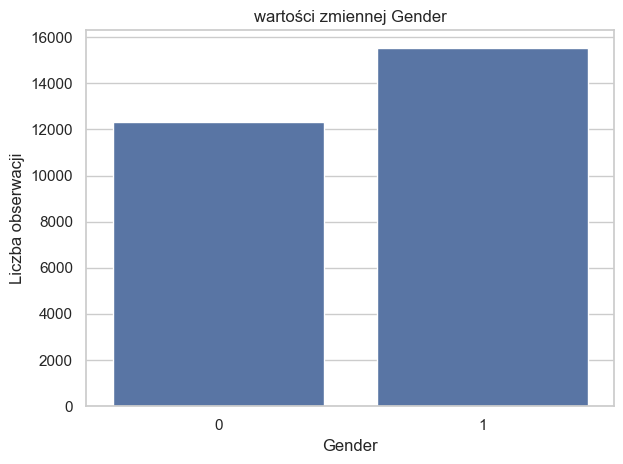

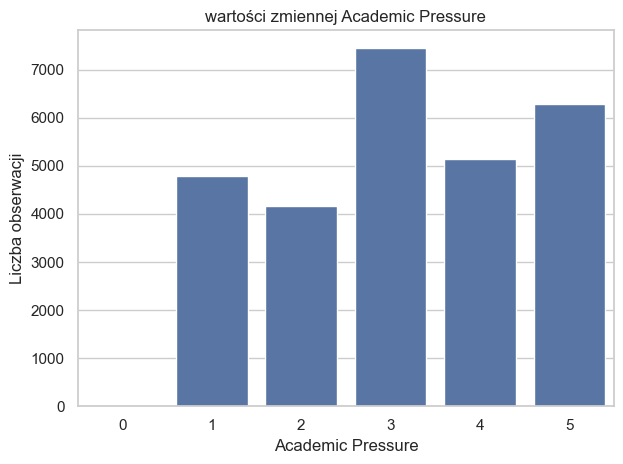

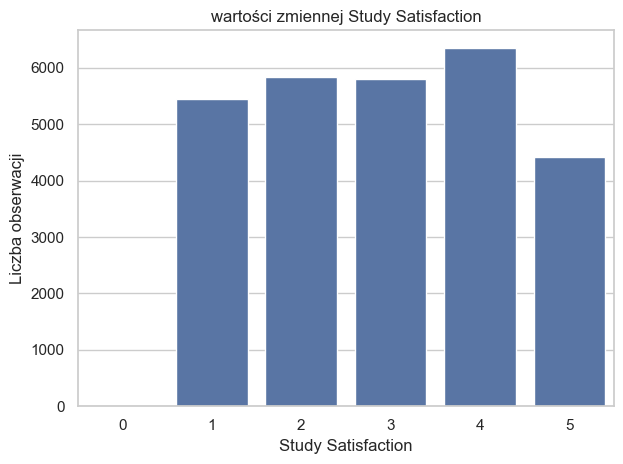

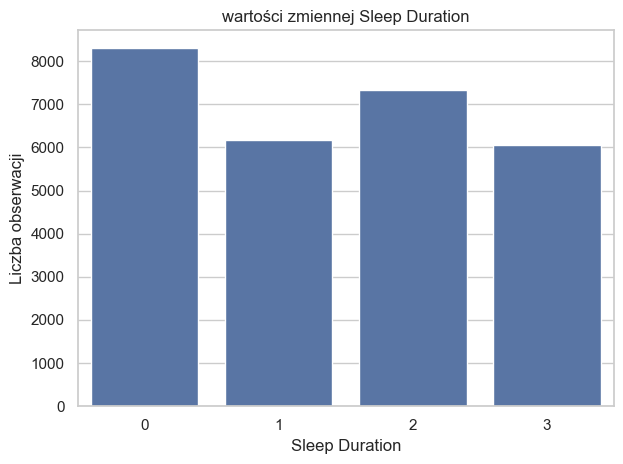

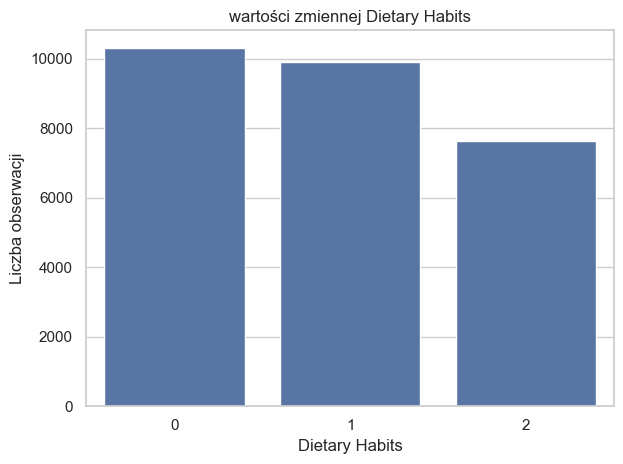

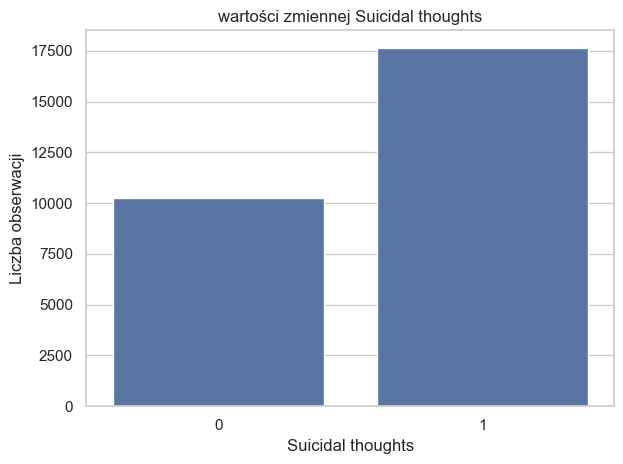

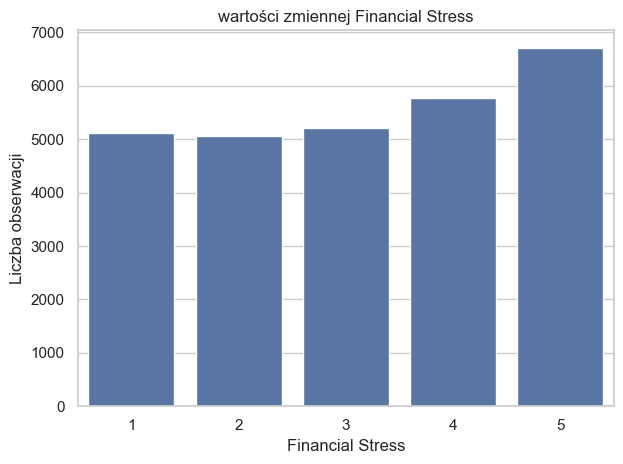

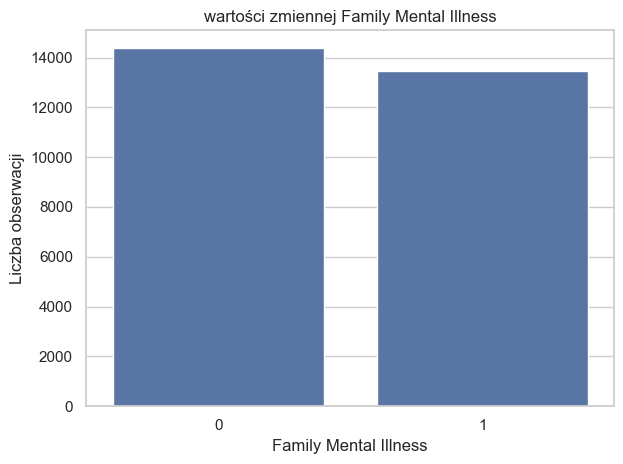

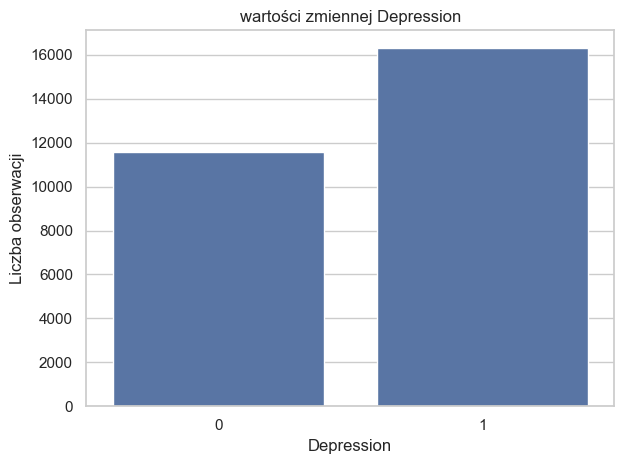

In [11]:
sns.set(style = 'whitegrid')

factors = ['Gender', 'Academic Pressure', 'Study Satisfaction', 'Sleep Duration',
                'Dietary Habits', 'Suicidal thoughts', 'Financial Stress', 'Family Mental Illness', 'Depression']

for i in factors:
    sns.countplot(x=dane[i])
    plt.title(f'wartości zmiennej {i}')
    plt.xlabel(i)
    plt.ylabel('Liczba obserwacji')
    plt.xticks(rotation = 0)
    plt.tight_layout()
    plt.show()

### Struktura zbioru

Braki w danych:

In [13]:
dane.isnull().sum()
# Nie ma braków w danych

id                       0
Gender                   0
Age                      0
Academic Pressure        0
CGPA                     0
Study Satisfaction       0
Sleep Duration           0
Dietary Habits           0
Suicidal thoughts        0
Work/Study Hours         0
Financial Stress         0
Family Mental Illness    0
Depression               0
dtype: int64

In [15]:
print(dane.describe(include = 'all').round(2))

              id    Gender       Age  Academic Pressure      CGPA  \
count   27855.00  27855.00  27855.00           27855.00  27855.00   
mean    70439.69      0.56     25.82               3.14      7.66   
std     40637.14      0.50      4.91               1.38      1.47   
min         2.00      0.00     18.00               0.00      0.00   
25%     35049.50      0.00     21.00               2.00      6.29   
50%     70662.00      1.00     25.00               3.00      7.77   
75%    105816.00      1.00     30.00               4.00      8.92   
max    140699.00      1.00     59.00               5.00     10.00   

       Study Satisfaction  Sleep Duration  Dietary Habits  Suicidal thoughts  \
count            27855.00        27855.00         27855.0           27855.00   
mean                 2.94            1.40             0.9               0.63   
std                  1.36            1.13             0.8               0.48   
min                  0.00            0.00             0.0 

# 2. Kuba

In [17]:
# Przygotowanie do klasyfikacji

#wczytanie funkcji
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn import svm, metrics
from sklearn.model_selection import cross_val_score

# podział danych
print(dane.shape)
y=dane.loc[:,"Depression"]
X=dane.iloc[:,1:12]
print(X.head)


(27855, 13)
<bound method NDFrame.head of        Gender  Age  Academic Pressure  CGPA  Study Satisfaction  \
0           1   33                  5  8.97                   2   
1           0   24                  2  5.90                   5   
2           1   31                  3  7.03                   5   
3           0   28                  3  5.59                   2   
4           0   25                  4  8.13                   3   
...       ...  ...                ...   ...                 ...   
27850       0   27                  5  5.75                   5   
27851       1   27                  2  9.40                   3   
27852       1   31                  3  6.61                   4   
27853       0   18                  5  6.88                   2   
27854       1   27                  4  9.24                   1   

       Sleep Duration  Dietary Habits  Suicidal thoughts  Work/Study Hours  \
0                   1               2                  1                 3 

## 2.1 Regresja logistyczna

In [19]:
model = LogisticRegression(solver = "liblinear", random_state = 1, C = 10)
model.fit(X,y)

p_pred = model.predict_proba(X)
y_pred = model.predict(X)
score_ = model.score(X,y)
cm = confusion_matrix(y,y_pred)

## wydruk parametrów funkcji logistycznej
print('wyraz wolny=', model.intercept_)
print('współczynniki:', model.coef_, end='\n\n')
print(X.head(1), end='\n\n')

## trafność klasyfikacji
dw = cm[0][0]+cm[1][1] #dobre wyniki
fp = cm[1][0] #błędna klasyfikacja - występuje depresja, ale nie zaklasyfikowana w ten sposób
pf = cm[0][1]

Sk = dw/(dw+fp+pf)
print('Skuteczność=', round(Sk,3))

Cz = cm[0][0]/(cm[0][0]+pf)
print("Czułość=", round(Cz,3))

Sp = cm[1][1]/(cm[1][1]+fp)
print('Specyficzność=', round(Sp,3))

wyraz wolny= [-2.4678629]
współczynniki: [[-0.00356551 -0.10993799  0.83718573  0.06070964 -0.24514788 -0.1868844
  -0.54790844  2.5093545   0.11712404  0.55460321  0.24786863]]

   Gender  Age  Academic Pressure  CGPA  Study Satisfaction  Sleep Duration  \
0       1   33                  5  8.97                   2               1   

   Dietary Habits  Suicidal thoughts  Work/Study Hours  Financial Stress  \
0               2                  1                 3                 1   

   Family Mental Illness  
0                      0  

Skuteczność= 0.847
Czułość= 0.791
Specyficzność= 0.886


In [21]:
print(X.iloc[:,0]) #Jeśli mężczyzna to 1, kobieta - 0

0        1
1        0
2        1
3        0
4        0
        ..
27850    0
27851    1
27852    1
27853    0
27854    1
Name: Gender, Length: 27855, dtype: int64


## 2.2. K najbliższych sąsiadów

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1) # podział na zbiór uczący i testowy
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
cm=confusion_matrix(y_test, y_pred)

print("macierz predykcji klasyfikacji:", cm, sep='\n')

## trafność klasyfikacji
dw = cm[0][0]+cm[1][1] #dobre wyniki
fp = cm[1][0] #błędna klasyfikacja - występuje depresja, ale nie zaklasyfikowana w ten sposób
pf = cm[0][1]

Sk = dw/(dw+fp+pf)
print('Skuteczność=', round(Sk,3))

Cz = cm[0][0]/(cm[0][0]+pf)
print("Czułość=", round(Cz,3))

Sp = cm[1][1]/(cm[1][1]+fp)
print('Specyficzność=', round(Sp,3))

macierz predykcji klasyfikacji:
[[2008  814]
 [ 686 3456]]
Skuteczność= 0.785
Czułość= 0.712
Specyficzność= 0.834


## 2.3 Maszyna wektorów wspierajcych

In [25]:
C = 1
model_1 = svm.SVC(kernel='linear', C=C).fit(X_train,y_train)
model_1.score(X_test, y_test)
scores = cross_val_score(model_1, X_test, y_test, cv=5)


In [26]:
print('Skuteczność',scores, sep='\n')
print('średnia skuteczność z 5 walidacji=', round(np.mean(scores),3))
#[0.76989247 0.76917563 0.77491039 0.79426523 0.75197133] 

Skuteczność
[0.84709261 0.84422111 0.84781048 0.83704235 0.85632184]
średnia skuteczność z 5 walidacji= 0.846


# 3. Hania
### Metody klasyfikacji oparte na drzewach 
Zmienna celu: Depression
0 - brak (41%)
1 - depresja (59%)

In [29]:
print(X.describe().round(2))
print(y.head())

         Gender       Age  Academic Pressure      CGPA  Study Satisfaction  \
count  27855.00  27855.00           27855.00  27855.00            27855.00   
mean       0.56     25.82               3.14      7.66                2.94   
std        0.50      4.91               1.38      1.47                1.36   
min        0.00     18.00               0.00      0.00                0.00   
25%        0.00     21.00               2.00      6.29                2.00   
50%        1.00     25.00               3.00      7.77                3.00   
75%        1.00     30.00               4.00      8.92                4.00   
max        1.00     59.00               5.00     10.00                5.00   

       Sleep Duration  Dietary Habits  Suicidal thoughts  Work/Study Hours  \
count        27855.00         27855.0           27855.00          27855.00   
mean             1.40             0.9               0.63              7.16   
std              1.13             0.8               0.48       

In [31]:
dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27855 entries, 0 to 27854
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     27855 non-null  int64  
 1   Gender                 27855 non-null  int64  
 2   Age                    27855 non-null  int64  
 3   Academic Pressure      27855 non-null  int64  
 4   CGPA                   27855 non-null  float64
 5   Study Satisfaction     27855 non-null  int64  
 6   Sleep Duration         27855 non-null  int64  
 7   Dietary Habits         27855 non-null  int64  
 8   Suicidal thoughts      27855 non-null  int64  
 9   Work/Study Hours       27855 non-null  int64  
 10  Financial Stress       27855 non-null  int64  
 11  Family Mental Illness  27855 non-null  int64  
 12  Depression             27855 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 2.8 MB


In [33]:
# import pakietów
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier, plot_tree  #klasyfikator drzewa decyzyjnego, wykres
from sklearn.model_selection import train_test_split #funkcja do podziału danych na zbiór uczący i testowy
from sklearn.metrics import confusion_matrix, classification_report #funkcje do oceny klasyfikatora

In [35]:
# podział na zbiory uczacy i testowy z zachowaniem proporcji klas:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify = y)

### 3.1 Drzewa decyzyjne

In [45]:
tree = DecisionTreeClassifier(
    max_depth = 4,              # przycinamy drzewo na głębokości 4
    min_samples_leaf = 50,      # każdy liść musi mieć ≥50 obserwacji
    random_state = 0
)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=50, random_state=0)

#### Klasyfikacja na zbiorze uczącym:

[[ 6507  2160]
 [ 1503 10721]]
              precision    recall  f1-score   support

           0       0.81      0.75      0.78      8667
           1       0.83      0.88      0.85     12224

    accuracy                           0.82     20891
   macro avg       0.82      0.81      0.82     20891
weighted avg       0.82      0.82      0.82     20891



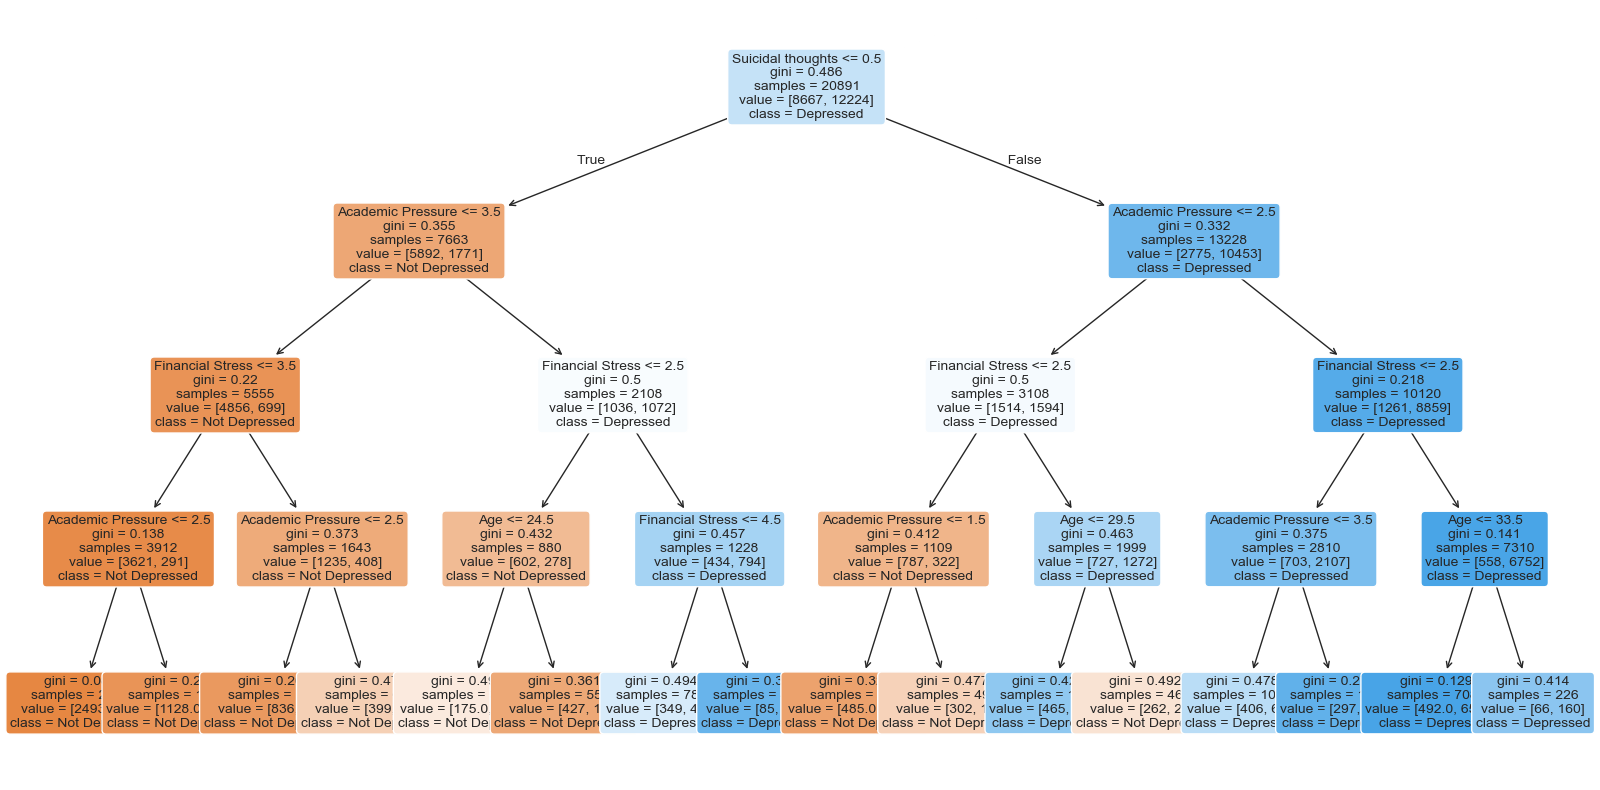

In [47]:
y_train_pred_tree = tree.predict(X_train)

print(confusion_matrix(y_train, y_train_pred_tree))
print(classification_report(y_train, y_train_pred_tree))

plt.figure(figsize=(20, 10))

plot_tree(
    tree,
    feature_names = X.columns,            
    class_names = ["Not Depressed", "Depressed"],       
    filled = True,                         
    rounded = True,                        
    fontsize = 10                        
)

plt.show()

#### Predykcja na zbiorze testowym:

In [49]:
y_pred_tree = tree.predict(X_test)
print(confusion_matrix(y_test, y_pred_tree))
#Actual (wiersze) / Predicted (kolumny)
print(classification_report(y_test, y_pred_tree))

[[2171  718]
 [ 519 3556]]
              precision    recall  f1-score   support

           0       0.81      0.75      0.78      2889
           1       0.83      0.87      0.85      4075

    accuracy                           0.82      6964
   macro avg       0.82      0.81      0.82      6964
weighted avg       0.82      0.82      0.82      6964



#### Ważność cech:

In [129]:
waznosc = tree.feature_importances_

for i in range(len(waznosc)):
    print(X.columns[i], ":", round(waznosc[i], 4))

Gender : 0.0
Age : 0.0184
Academic Pressure : 0.25
CGPA : 0.0
Study Satisfaction : 0.0
Sleep Duration : 0.0
Dietary Habits : 0.0
Suicidal thoughts : 0.626
Work/Study Hours : 0.0
Financial Stress : 0.1056
Family Mental Illness : 0.0


### 3.2 Las losowy
z kroswalidacja GridSearch

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [105]:
# Siatka hiperparametrów
hiperparametry_rf = {
    'n_estimators': [50, 100, 200],  # liczba drzew
    'max_depth': [3, 5, 7, None],    # maksymalna głębokość drzewa
    'max_features': ['sqrt', 'log2'] # ile cech przy podziale
}

siatka_rf = GridSearchCV(
    RandomForestClassifier(random_state = 1),
    param_grid = hiperparametry_rf,
    scoring = 'accuracy',
    cv = 5,
    n_jobs = -1
)

siatka_rf.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, None],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [106]:
print("Najlepsze parametry:", siatka_rf.best_params_)
print("Accuracy:", siatka_rf.best_score_)

Najlepsze parametry: {'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 100}
Accuracy: 0.8396338179859988


#### Klasyfikacja na zbiorze uczącym:

In [100]:
y_train_pred_rf = siatka_rf.predict(X_train)

print(confusion_matrix(y_train, y_train_pred_rf))
print(classification_report(y_train, y_train_pred_rf))


[[ 6760  1907]
 [ 1282 10942]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      8667
           1       0.85      0.90      0.87     12224

    accuracy                           0.85     20891
   macro avg       0.85      0.84      0.84     20891
weighted avg       0.85      0.85      0.85     20891



#### Predykcja na zbiorze testowym:

In [96]:
y_pred_rf = siatka_rf.predict(X_test)

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[2247  642]
 [ 439 3636]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81      2889
           1       0.85      0.89      0.87      4075

    accuracy                           0.84      6964
   macro avg       0.84      0.84      0.84      6964
weighted avg       0.84      0.84      0.84      6964



#### Ważność cech

In [131]:
parametry_rf = siatka_rf.best_estimator_
waznosc = parametry_rf.feature_importances_

print("Ważność cech – Random Forest:")
for i in range(len(waznosc)):
    print(X.columns[i], ":", round(waznosc[i], 4))

Ważność cech – Random Forest:
Gender : 0.0008
Age : 0.0556
Academic Pressure : 0.2618
CGPA : 0.0069
Study Satisfaction : 0.0179
Sleep Duration : 0.0054
Dietary Habits : 0.033
Suicidal thoughts : 0.4466
Work/Study Hours : 0.0341
Financial Stress : 0.1366
Family Mental Illness : 0.0013


### 3.3 Bagging

In [115]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# baza - drzewo
baza = DecisionTreeClassifier(random_state = 1)

bag = BaggingClassifier(
    estimator = baza,
    n_estimators = 100,           # liczba modeli w ensemble
    max_samples = 1.0,            # rozmiar próbki bootstrapowej (100% danych)
    bootstrap = True,             # losowanie ze zwracaniem
    oob_score = True,             # ocenimy jakość predykcji "out-of-bag"
    random_state = 0
)

bag.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1),
                  n_estimators=100, oob_score=True, random_state=0)

#### Klasyfikacja na zbiorze uczącym:

In [117]:
y_train_pred_bag = bag.predict(X_train)

print(confusion_matrix(y_train, y_train_pred_bag))
print(classification_report(y_train, y_train_pred_bag))

[[ 8667     0]
 [    0 12224]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8667
           1       1.00      1.00      1.00     12224

    accuracy                           1.00     20891
   macro avg       1.00      1.00      1.00     20891
weighted avg       1.00      1.00      1.00     20891



#### Predykcja na zbiorze testowym:

In [119]:
y_pred_bag = bag.predict(X_test)

print(confusion_matrix(y_test, y_pred_bag))
print(classification_report(y_test, y_pred_bag))

[[2250  639]
 [ 538 3537]]
              precision    recall  f1-score   support

           0       0.81      0.78      0.79      2889
           1       0.85      0.87      0.86      4075

    accuracy                           0.83      6964
   macro avg       0.83      0.82      0.83      6964
weighted avg       0.83      0.83      0.83      6964



#### Ważność cech:

In [133]:
# ważności cech z każdego drzewa:
waznosci_drzew = [i.feature_importances_ for i in bag.estimators_]

# średnia ważność:
waznosc = np.mean(waznosci_drzew, axis=0)

print("Ważność cech – Bagging:")
for i in range(len(waznosc)):
    print(X.columns[i], ":", round(waznosc[i], 4))

Ważność cech – Bagging:
Gender : 0.0183
Age : 0.097
Academic Pressure : 0.1371
CGPA : 0.1458
Study Satisfaction : 0.0499
Sleep Duration : 0.0419
Dietary Habits : 0.035
Suicidal thoughts : 0.2999
Work/Study Hours : 0.0793
Financial Stress : 0.0766
Family Mental Illness : 0.0193


### 3.4 Gradient Boosting

In [137]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(
    n_estimators = 100, # liczba iteracji boostingu
    learning_rate = 0.1, # waga każdego kolejnego drzewa
    max_depth = 3, # maksymalna głębokość drzewa
    random_state = 1
)

gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

#### Klasyfikacja na zbiorze uczącym:

In [141]:
y_train_pred_gb = gb.predict(X_train)

print(confusion_matrix(y_train, y_train_pred_gb))
print(classification_report(y_train, y_train_pred_gb))

[[ 6898  1769]
 [ 1303 10921]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      8667
           1       0.86      0.89      0.88     12224

    accuracy                           0.85     20891
   macro avg       0.85      0.84      0.85     20891
weighted avg       0.85      0.85      0.85     20891



#### Predykcja na zbiorze testowym:

In [143]:
y_pred_gb = gb.predict(X_test)

print(confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

[[2273  616]
 [ 463 3612]]
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      2889
           1       0.85      0.89      0.87      4075

    accuracy                           0.85      6964
   macro avg       0.84      0.84      0.84      6964
weighted avg       0.84      0.85      0.84      6964



#### Ważność cech:

In [145]:
waznosc = gb.feature_importances_

print("Ważność cech – Gradient Boosting:")
for i in range(len(waznosc)):
    print(X.columns[i], ":", round(waznosc[i], 4))

Ważność cech – Gradient Boosting:
Gender : 0.0004
Age : 0.048
Academic Pressure : 0.2401
CGPA : 0.0038
Study Satisfaction : 0.014
Sleep Duration : 0.0061
Dietary Habits : 0.0264
Suicidal thoughts : 0.5196
Work/Study Hours : 0.0267
Financial Stress : 0.1127
Family Mental Illness : 0.0022


### 3.5 XGBoost

In [ ]:
!pip install xgboost

In [149]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators = 100,
    learning_rate = 0.1,
    max_depth = 3,
    eval_metric = 'logloss',
    random_state = 0
)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

#### Klasyfikacja na zbiorze uczącym:

In [153]:
y_train_pred_xgb = xgb.predict(X_train)

print(confusion_matrix(y_train, y_train_pred_xgb))
print(classification_report(y_train, y_train_pred_xgb))

[[ 6897  1770]
 [ 1292 10932]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      8667
           1       0.86      0.89      0.88     12224

    accuracy                           0.85     20891
   macro avg       0.85      0.85      0.85     20891
weighted avg       0.85      0.85      0.85     20891



#### Predykcja na zbiorze testowym:

In [155]:
y_pred_xgb = xgb.predict(X_test)

print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

[[2272  617]
 [ 461 3614]]
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      2889
           1       0.85      0.89      0.87      4075

    accuracy                           0.85      6964
   macro avg       0.84      0.84      0.84      6964
weighted avg       0.84      0.85      0.84      6964



#### Ważność cech:

In [151]:
waznosc = xgb.feature_importances_

print("Ważność cech – XGBoost:")
for i in range(len(waznosc)):
    print(X.columns[i], ":", round(waznosc[i], 4))

Ważność cech – XGBoost:
Gender : 0.0064
Age : 0.036
Academic Pressure : 0.1455
CGPA : 0.0067
Study Satisfaction : 0.027
Sleep Duration : 0.016
Dietary Habits : 0.0429
Suicidal thoughts : 0.5824
Work/Study Hours : 0.0362
Financial Stress : 0.0869
Family Mental Illness : 0.014
